# Predicting Patient No Shows With Neural Networks !

Let's use machine learning to figure out why 30% of patients miss their scheduled appointments!

This project will be orgnaized as such:
1. Collect Data
2. Data Preprocessing
3. EDA
4. Model Buidling
5. Conclusions

## 1. Collect Data

Because I do not readily have access to my own data, for this project, we will be using Kaggle's "Medical Appointment No Shows." You can [download the file here](https://www.kaggle.com/joniarroba/noshowappointments) if you want to follow along with this code. 

In [1]:
# import out necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data
noShows = pd.read_csv('KaggleV2-May-2016.csv')
noShows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 2. Data Preprocessing 

You can read a bit more about the importance of data preprocessing [here](https://medium.com/swlh/data-pre-processing-data-wrangling-4a6a8624e747).

First, lets take a look at what were working with:

2.1 Clean Data

There are a few housekeeping taks we need to perform based on the data head, such as:
- correcting some spelling
- dropping columns with no value


In [3]:
# Correcting a few spelling errors in the original table
noShows.rename(columns = {'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)

# Tidying the table by dropping useless columns
noShows.drop('PatientId', axis=1, inplace = True)
noShows.drop('AppointmentID', axis=1, inplace = True)

In [4]:
# Checking for NaNs and outliers
print('Age:',sorted(noShows.Age.unique()))
print('Gender:',noShows.Gender.unique())
print('Diabetes:',noShows.Diabetes.unique())
print('Alchoholism:',noShows.Alcoholism.unique())
print('Hypertension:',noShows.Hypertension.unique())
print('Handicap:',noShows.Handicap.unique())
print('Scholarship:',noShows.Scholarship.unique())
print('SMS_received:',noShows.SMS_received.unique())
print('Neighbourhood:',noShows.Neighbourhood.unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Diabetes: [0 1]
Alchoholism: [0 1]
Hypertension: [1 0]
Handicap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]
Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁ

In [5]:
# Assuming nobody has an age of -1 year, delete this record
# Also assuming age 0 means babies
noShows = noShows[noShows.Age >= 0]

print('Age:',sorted(noShows.Age.unique()))

Age: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


2.2 Feature Engineering + Data Transformation

In [6]:
# Convert categorical variable to binary
noShows['No-show'] = noShows['No-show'].map({'Yes':1, 'No':0})
noShows['Gender'] = noShows['Gender'].map({'F':1, 'M':0})

# We're only interested in the date, and not the time of day, so we'll remove the time with the below:
noShows.ScheduledDay = noShows.ScheduledDay.apply(np.datetime64)
noShows['ScheduledDay'] = noShows['ScheduledDay'].dt.date

# Converting date columns into datetime64 datatype
noShows.AppointmentDay = noShows.AppointmentDay.apply(np.datetime64)
noShows.ScheduledDay = noShows.ScheduledDay.apply(np.datetime64)

# Adding a column for 'Waiting Time'
noShows['WaitingTime'] = pd.to_timedelta((noShows['AppointmentDay'] - noShows['ScheduledDay'])).dt.days
noShows['WaitingTime'] = noShows['WaitingTime'].apply(np.int64)

# Create Dummy Variables for Neighborhood
dummy_cols = ['Neighbourhood']
noShows = pd.get_dummies(noShows, columns = dummy_cols)
noShows.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,1,2016-04-29,2016-04-29,62,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2016-04-29,2016-04-29,56,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2016-04-29,2016-04-29,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2016-04-29,2016-04-29,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2016-04-29,2016-04-29,56,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
noShows.head()

# Note: the timepoints for 'AppointmentDay' have all dissapeared, as they were set exactly to 00:00:00

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,1,2016-04-29,2016-04-29,62,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2016-04-29,2016-04-29,56,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2016-04-29,2016-04-29,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2016-04-29,2016-04-29,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2016-04-29,2016-04-29,56,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print("\nNoShow and Show '%' of Patients\n")
show = noShows.groupby(['No-show']).size()[0]/(noShows.groupby(['No-show']).size()[0]+noShows.groupby(['No-show']).size()[1])
print("Percent of Patients who `Showed Up` => {:.2f}%".format(show*100))
noshow = noShows.groupby(['No-show']).size()[1]/(noShows.groupby(['No-show']).size()[0]+noShows.groupby(['No-show']).size()[1])
print("Percent of Patients who Did `Not Showed Up` => {:.2f}%".format(noshow*100))


NoShow and Show '%' of Patients

Percent of Patients who `Showed Up` => 79.81%
Percent of Patients who Did `Not Showed Up` => 20.19%


## 2. Exploratory Data Analysis

## 3. Build Model that Predicts if a patient will show up to their appointment

3.1 Create testing and training sets. 

In [9]:
# choose out colunms of interest
prediction_var = ['Gender','Age','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received','WaitingTime']
noShows_drop = noShows[prediction_var]

In [10]:
 from sklearn.model_selection import train_test_split
 
 train, test = train_test_split(noShows, test_size = 0.15)

In [11]:
# variables used for prediciton
train_x = train[prediction_var]
# predicting no-shows
train_y = train['No-show']

# variables used for testing model 
test_x = test[prediction_var]
# predicting no-shows
test_y = test['No-show']

print("Train set data shape: " + str(train_x.shape))
print("Test set data shape: " + str(test_x.shape))

Train set data shape: (93947, 9)
Test set data shape: (16579, 9)


In [12]:
df = train_x
print(df[(df < 0).all(axis=1)])

Empty DataFrame
Columns: [Gender, Age, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, WaitingTime]
Index: []


In [13]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

def report(y_test, y_pred):
    """
    Creates confusion matrix and classification report
    
    Args:
    y_test: splitted test dataframe labels
    y_pred: predictions for test dataframe
    
    Returns:
    None
    """
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True,fmt='d',cmap="flare");

    print(classification_report(y_test,y_pred))

3.3 Build a DecisionTreeClassifier

In [14]:
# import DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier

#create DecisionTreeClassifier classification obj
dt_clf = DecisionTreeClassifier(random_state=0)

#training via DecisionTreeClassifier classficiation model
dt_clf.fit(train_x, train_y)

#make prediction using the test set
pred_y = dt_clf.predict(test_x)

print("Feature Importance:\n")
for name, importance in zip(noShows_drop.columns, np.sort(dt_clf.feature_importances_)[::-1]):
    print("{} -- {:.2f}".format(name, importance))

Feature Importance:

Gender -- 0.51
Age -- 0.32
Scholarship -- 0.05
Hypertension -- 0.03
Diabetes -- 0.03
Alcoholism -- 0.02
Handicap -- 0.02
SMS_received -- 0.02
WaitingTime -- 0.01


In [15]:
dt_clf.score(test_x, test_y)

0.7649436033536402

2. Build a RandomForestClassifier

In [16]:
# import RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

#create RandomForestClassifier classification obj
rf_clf  = RandomForestClassifier(random_state=0)

#training via RandomForestClassifier classficiation model
rf_clf.fit(train_x, train_y)

print("Feature Importance:\n")
for name, importance in zip(noShows_drop.columns, np.sort(rf_clf.feature_importances_)[::-1]):
    print("{} -- {:.2f}".format(name, importance))

Feature Importance:

Gender -- 0.52
Age -- 0.40
Scholarship -- 0.02
Hypertension -- 0.02
Diabetes -- 0.01
Alcoholism -- 0.01
Handicap -- 0.01
SMS_received -- 0.01
WaitingTime -- 0.01


In [17]:
rf_clf.score(test_x, test_y)

0.7663309005368237

Build a Neural Network to Classify 

In [18]:
# import our model. We are using a shallow NN
from sklearn.neural_network import MLPClassifier

# create model + tune hyper parameters
model = MLPClassifier(hidden_layer_sizes=(5, 2))

In [19]:
# fit the model using the training variables + answers
model.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(5, 2))

In [20]:
# ask the model to predict the probability of no show vs NOT no show
proba_prediction = model.predict_proba(test_x)
# probability at each point of that patient being a no-shows
prediction = proba_prediction[:,1]
prediction

array([0.3427608 , 0.26341053, 0.24750035, ..., 0.22418585, 0.30171473,
       0.02340378])

In [21]:
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
def ROCAUC(test_y, prediction):
    fpr, tpr, threshold = metrics.roc_curve(test_y, prediction)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    plt.show()
    
# Precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')
    auc = metrics.auc(recall, precision)
    plt.plot(recall, precision, linewidth=2, label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

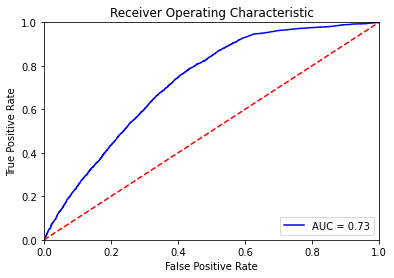

In [22]:
ROCAUC(test_y, prediction)

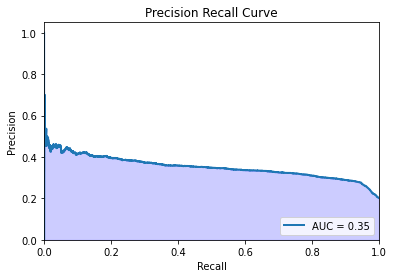

In [23]:
precision, recall, thresholds = precision_recall_curve(test_y, prediction)
plot_precision_recall()

The model is doing an okay job the ROC AUC is 0.72, but the PR AUC is 0.35... not too hot.  